# LEE Analyzer Data/MC comparison plots


## Imports & Constants

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from helpfunction import CheckBorderTPC,sciNot,sciNot2

%matplotlib inline

pd.options.display.max_columns = 999
gr      = 1.618

mass_p= 0.93827 #GeV
mass_e= 0.00511 #GeV
fid_min=10

# Fiducial volume borders in x,y,z:
fid_arr= [[10,10],[20,20],[10,50]]

In [2]:
catdefs={1: 'Cosmic',
            2: 'e CC',
            3: 'mu CC',
            4: 'NC',
            5: 'Dirt',
            6: 'Data',
            7: 'Mixed',
            0: 'Other'}



def categoryPlus(row):
    label = catdefs[row['category']]
    if row['nu_pdg']==12:
        if label=='e CC':
            return r'$\nu_e$ CC   '
        elif label=='Mixed':
            return r'$\nu_e$ cont.   '
        else:
            return label+' '*(12-len( label))
    
    elif row['nu_pdg']==14:
        if label=='mu CC':
            return r'$\nu_{\mu}$ CC       '
        elif label=='Mixed':
            return r'$\nu_{\mu}$ cont.   '
        else:
            return  label+' '*(12-len( label))
        
    elif row['nu_pdg']==4294967282 or row['nu_pdg']==4294967284:
        return r'$\bar{\nu}_{\mu} / \bar{\nu}_e$          '
    else:
        print (row['nu_pdg'])
        return 'Cosmic intime '
    
# Formatting
def sciNotSpace(x):
    x=float(x)
    return "{:4.1f}".format(x)

## Load Pickle file

In [4]:
df_all = pd.read_pickle('../Input/nu/nu_score_3_9.pckl')
print('Dataframe loaded from Pickle has '+str(len(df_all.index))+' entries.' )
pot_this = (2.180158137e+20+
      2.33446398155e+20+
      2.33616945236e+20+
      2.33947289543e+20+
      2.34097847098e+20+
      2.34252417822e+20+
      2.34638808105e+20
     )
total_data_bnb_pot = 4.947e+19
total_data_pot     = 6.6e+20

pot_ratio1 = pot_this/total_data_bnb_pot
pot_ratio2 = pot_this/total_data_pot

Dataframe loaded from Pickle has 273185 entries.


In [5]:
df_all.head(5)

,vx,vy,vz,event,subrun,run,shower_nhits,track_nhits,bnbweight,reconstructed_energy,flash_PE,flash_time,nu_E,nu_pdg,true_vx_sce,true_vy_sce,true_vz_sce,category,distance,CC_daughter_E,shower_containment_q,shower_sp_profile,shower_electron_score,track_muon_score,shower_muon_score,track_electron_score,track_electron_score,track_closest_electron_score,shower_closest_electron_score,true_fidvol
0,202.832489,-1.772082,468.276245,245907,4919,4,[3.0],"[151.0, 100.0, 9.0]",0.988400,0.345238,619.125610,4.036875,0.689439,14,203.033920,-1.730939,468.264557,3,0.205915,0.242973,0.999960,0.543426,[0.0480945],"[0.0027959119, 0.6761681, 0.00535628]",[0.49891007],"[0.0005272261, 0.0032864704, 0.01760899]","[0.0005272261, 0.0032864704, 0.01760899]","[0.0002470479, 0.001073492, 0.007816169]",[0.017514972],True
1,158.849121,94.829483,482.728180,245909,4919,4,[7.0],"[44.0, 339.0, 23.0, 20.0, 0.0]",0.993612,0.809570,1449.457520,4.502500,1.094919,14,159.272476,94.556442,482.908936,7,0.535207,0.412273,0.783349,0.698667,[0.10826185],"[0.6142656, 0.0040242304, 0.006169776]",[0.10220106],"[0.012458428, 0.010496854, 0.007780319]","[0.012458428, 0.010496854, 0.007780319]","[0.011702828, 0.0064834487, 0.0036715933]",[0.040197052],True
2,131.777161,28.212620,506.013580,245915,4919,4,[19.0],"[227.0, 23.0]",0.991477,0.368412,1631.934692,4.608125,1.143622,14,132.099518,28.164474,506.232819,3,0.392801,0.449911,0.999997,0.582741,[0.00083151786],"[0.93345594, 0.2366516]",[0.0027305086],"[0.00031523878, 0.1812002]","[0.00031523878, 0.1812002]","[0.00028647855, 0.112802394]",[0.0016103965],True
3,53.050125,50.404400,608.815674,245926,4919,4,[28.0],[],0.989228,0.025729,1035.586670,3.211250,1.365804,14,-11.883159,124.931145,543.321838,1,118.574913,0.795818,0.999997,0.596920,[0.07174694],[],[0.6157554],[],[],[],[0.030941617],False
4,107.176971,53.432106,851.840820,245933,4919,4,[5.0],"[257.0, 9.0, 0.0]",0.996072,0.340504,3076.938721,4.711250,0.757303,14,107.732170,54.357109,851.402710,3,1.164395,0.421589,0.999996,0.515377,[0.043117106],"[0.9587698, 0.002376736]",[0.16502224],"[0.0010660853, 0.0030050445]","[0.0010660853, 0.0030050445]","[0.00045920807, 0.0013035814]",[0.01706132],True


## Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fc1506438>]],
      dtype=object)

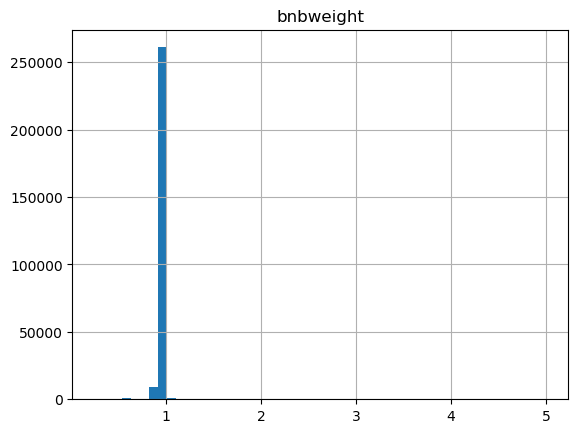

In [6]:
plt.style.use('default')
df_all.hist('bnbweight',bins=50)

In [7]:
# Quickfix for duplicate columns, ugly
cols=pd.Series(df_all.columns)
for dup in df_all.columns.get_duplicates(): cols[df_all.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(df_all.columns.get_loc(dup).sum())]
df_all.columns=cols
df_all.drop(columns='track_electron_score.1',inplace=True)
df_all.head()

,vx,vy,vz,event,subrun,run,shower_nhits,track_nhits,bnbweight,reconstructed_energy,flash_PE,flash_time,nu_E,nu_pdg,true_vx_sce,true_vy_sce,true_vz_sce,category,distance,CC_daughter_E,shower_containment_q,shower_sp_profile,shower_electron_score,track_muon_score,shower_muon_score,track_electron_score,track_closest_electron_score,shower_closest_electron_score,true_fidvol
0,202.832489,-1.772082,468.276245,245907,4919,4,[3.0],"[151.0, 100.0, 9.0]",0.988400,0.345238,619.125610,4.036875,0.689439,14,203.033920,-1.730939,468.264557,3,0.205915,0.242973,0.999960,0.543426,[0.0480945],"[0.0027959119, 0.6761681, 0.00535628]",[0.49891007],"[0.0005272261, 0.0032864704, 0.01760899]","[0.0002470479, 0.001073492, 0.007816169]",[0.017514972],True
1,158.849121,94.829483,482.728180,245909,4919,4,[7.0],"[44.0, 339.0, 23.0, 20.0, 0.0]",0.993612,0.809570,1449.457520,4.502500,1.094919,14,159.272476,94.556442,482.908936,7,0.535207,0.412273,0.783349,0.698667,[0.10826185],"[0.6142656, 0.0040242304, 0.006169776]",[0.10220106],"[0.012458428, 0.010496854, 0.007780319]","[0.011702828, 0.0064834487, 0.0036715933]",[0.040197052],True
2,131.777161,28.212620,506.013580,245915,4919,4,[19.0],"[227.0, 23.0]",0.991477,0.368412,1631.934692,4.608125,1.143622,14,132.099518,28.164474,506.232819,3,0.392801,0.449911,0.999997,0.582741,[0.00083151786],"[0.93345594, 0.2366516]",[0.0027305086],"[0.00031523878, 0.1812002]","[0.00028647855, 0.112802394]",[0.0016103965],True
3,53.050125,50.404400,608.815674,245926,4919,4,[28.0],[],0.989228,0.025729,1035.586670,3.211250,1.365804,14,-11.883159,124.931145,543.321838,1,118.574913,0.795818,0.999997,0.596920,[0.07174694],[],[0.6157554],[],[],[0.030941617],False
4,107.176971,53.432106,851.840820,245933,4919,4,[5.0],"[257.0, 9.0, 0.0]",0.996072,0.340504,3076.938721,4.711250,0.757303,14,107.732170,54.357109,851.402710,3,1.164395,0.421589,0.999996,0.515377,[0.043117106],"[0.9587698, 0.002376736]",[0.16502224],"[0.0010660853, 0.0030050445]","[0.00045920807, 0.0013035814]",[0.01706132],True


In [8]:
df_all[df_all['nu_pdg']==12].head()

,vx,vy,vz,event,subrun,run,shower_nhits,track_nhits,bnbweight,reconstructed_energy,flash_PE,flash_time,nu_E,nu_pdg,true_vx_sce,true_vy_sce,true_vz_sce,category,distance,CC_daughter_E,shower_containment_q,shower_sp_profile,shower_electron_score,track_muon_score,shower_muon_score,track_electron_score,track_closest_electron_score,shower_closest_electron_score,true_fidvol
53,132.800232,-77.745338,363.698456,371192,7424,1,[0.0],[118.0],0.846382,0.442588,246.506149,4.531250,1.395325,12,123.812286,190.574432,145.562134,1,345.918701,1.329542,0.000000,-1.000000,[],[0.9977276],[],[0.0005027338],[0.00025021133],[],False
56,195.045486,68.422966,422.919525,27901,559,2,[494.0],"[396.0, 119.0]",0.548681,1.379086,1321.008301,4.201250,1.173010,12,187.741653,50.032482,440.656586,7,26.573648,0.699943,1.000000,5.518942,[],"[0.99763775, 0.9274778]",[],"[0.00033626912, 0.0019430085]","[0.00015977994, 0.0006839455]",[],True
185,104.284241,46.303215,763.370117,442964,8860,5,[339.0],[],0.540832,0.465913,2811.809570,4.261250,0.710360,12,104.724579,46.397621,763.147705,2,0.502265,0.564379,1.000000,4.926088,[0.9258291],[],[0.025498917],[],[],[0.89974195],True
313,220.866302,50.684967,425.282043,64497,1290,2,[110.0],[39.0],0.537343,0.252036,387.221649,3.392500,0.443099,12,221.444901,50.416344,425.461639,2,0.662720,0.271457,0.943208,2.169500,[0.80408907],[0.008110323],[0.12120486],[0.0028412312],[0.0018075127],[0.7264544],True
457,222.502563,90.478790,246.119034,379924,7599,2,"[133.0, 0.0]",[],0.572820,0.120875,139.392792,4.246875,0.823131,12,282.229919,94.804298,215.738541,5,67.149384,0.608268,0.479746,0.922141,[],[],[],[],[],[],False


In [64]:
# Plot of the selected events in true neutrino energy:
df=df_all
df['catplus']=df.apply(categoryPlus,axis=1)

entries= len(df.index)

categories = df['catplus'].unique()

categories = ['$\\nu_e$ CC   ',
              '$\\nu_{\\mu}$ CC       ',
              '$\\nu_e$ cont.   ',
              '$\\nu_{\\mu}$ cont.   ',
              'NC          ',
              'Cosmic      ',
              'Dirt        ',
              '$\\bar{\\nu}_{\\mu} / \\bar{\\nu}_e$          ',
              
              ]


catlabs = ['$\\nu_e$ CC       ',
              '$\\nu_{\\mu}$ CC       ',
              '$\\nu_e$ cont.    ',
              '$\\nu_{\\mu}$ cont.   ',
              'NC           ',
              'Cosmic    ',
              'Dirt        ',
              '$\\bar{\\nu}_{\\mu} / \\bar{\\nu}_e$     ',
              ]


print (categories)
true_E = []
reco_E = [] 
counter= []
labels = []
bnbweight=[]

for cat,catlab in zip(categories,catlabs):
    true_E.append(df[df['catplus']==cat]['nu_E'])
    reco_E.append(df[df['catplus']==cat]['reconstructed_energy'])
    bnbweight.append(df[df['catplus']==cat]['bnbweight'])  
    lab = catlab+ '('+str(     int(round(len(true_E[-1])/pot_ratio2))) +')'
    labels.append(lab)
    


['$\\nu_e$ CC   ', '$\\nu_{\\mu}$ CC       ', '$\\nu_e$ cont.   ', '$\\nu_{\\mu}$ cont.   ', 'NC          ', 'Cosmic      ', 'Dirt        ', '$\\bar{\\nu}_{\\mu} / \\bar{\\nu}_e$          ']


/home/wouter/anaconda3/envs/mlenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


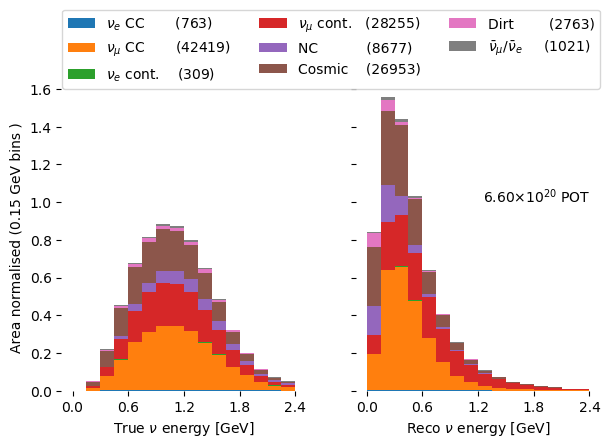

In [65]:

fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(4.3*gr,4),sharey=True,sharex=True)
#plt.suptitle(r'Passed events in True and Reconstructed $\nu$ Energy')
N = 16
min_x = 0.0
max_x = 2.4
step  = 0.6

ax[0].hist(true_E,N,weights=bnbweight, range=(min_x,max_x), stacked=True, fill=True,label=labels,normed=True)
ax[1].hist(reco_E,N,weights=bnbweight, range=(min_x,max_x), stacked=True, fill=True,label=labels,normed=True)

ax[0].set_ylabel('Area normalised ('+sciNot2((max_x-min_x)/N)+' GeV bins )')
ax[0].set_xlabel(r'True $\nu$ energy [GeV]')
ax[1].set_xlabel(r'Reco $\nu$ energy [GeV]')

plt.xticks(np.arange(min_x,max_x+step, step))
plt.legend(ncol=3,loc='upper center',bbox_to_anchor=(-0.1, 1.26))

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[1].text(1.25,1.0,sciNot2(total_data_pot/1e20)+r'$\times 10^{20}$ POT')

#ax[0].spines['top'].set_visible(False)
#ax[0].spines['right'].set_visible(False)
#ax[1].spines['top'].set_visible(False)
#ax[1].spines['right'].set_visible(False)

plt.savefig("BNB_mu.png",dpi=500,
            transparant=True,
               bbox_inches='tight', 
               pad_inches=0.1)

In [69]:
# Plot of the selected events in true neutrino energy:

df = df_all[df_all.apply(lambda x: np.all(np.array(x['track_muon_score'])<0.13) and
                                   np.all(np.array(x['shower_muon_score'])<0.12) and
                                   (np.any(np.array(x['shower_closest_electron_score'])>0.90) or 
                                    np.any(np.array(x['track_closest_electron_score'])>0.6) ),
                                  axis=1)]

entries= len(df.index)

categories = df['catplus'].unique()

categories = ['$\\nu_e$ CC   ',
              '$\\nu_{\\mu}$ CC       ',
              '$\\nu_e$ cont.   ',
              '$\\nu_{\\mu}$ cont.   ',
              'NC          ',
              'Cosmic      ',
              'Dirt        ',
              '$\\bar{\\nu}_{\\mu} / \\bar{\\nu}_e$          ',
              
              ]


catlabs = ['$\\nu_e$ CC       ',
              '$\\nu_{\\mu}$ CC       ',
              '$\\nu_e$ cont.    ',
              '$\\nu_{\\mu}$ cont.   ',
              'NC           ',
              'Cosmic    ',
              'Dirt        ',
              '$\\bar{\\nu}_{\\mu} / \\bar{\\nu}_e$     ',
              ]


true_E = []
reco_E = [] 
counter= []
labels = []
bnbweight=[]

for cat,catlab in zip(categories,catlabs):
    true_E.append(df[df['catplus']==cat]['nu_E'])
    reco_E.append(df[df['catplus']==cat]['reconstructed_energy'])
    bnbweight.append(df[df['catplus']==cat]['bnbweight'])  
    print(cat)
    lab = catlab+ '('+str(     int(round(len(true_E[-1])/pot_ratio2))) +')'
    labels.append(lab)
    


$\nu_e$ CC   
$\nu_{\mu}$ CC       
$\nu_e$ cont.   
$\nu_{\mu}$ cont.   
NC          
Cosmic      
Dirt        
$\bar{\nu}_{\mu} / \bar{\nu}_e$          


/home/wouter/anaconda3/envs/mlenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


470
2    284
4     69
3     61
1     39
7     10
5      7
Name: category, dtype: int64


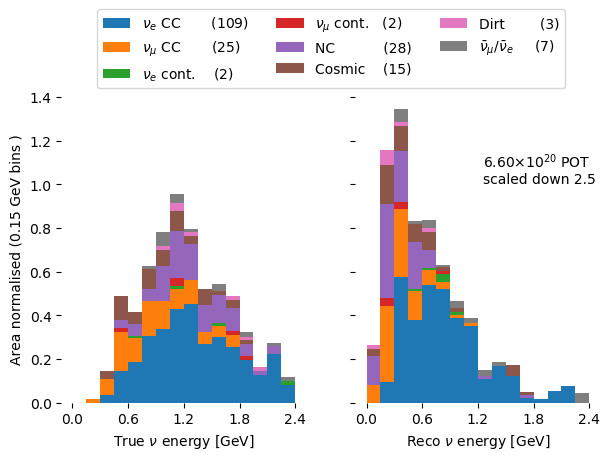

In [74]:

fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(4.3*gr,4),sharey=True,sharex=True)
#plt.suptitle(r'Passed events in True and Reconstructed $\nu$ Energy')
N = 16
min_x = 0.0
max_x = 2.4
step  = 0.6

ax[0].hist(true_E,N,weights=bnbweight, range=(min_x,max_x), stacked=True, fill=True,label=labels,normed=True)
ax[1].hist(reco_E,N,weights=bnbweight, range=(min_x,max_x), stacked=True, fill=True,label=labels,normed=True)

ax[0].set_ylabel('Area normalised ('+sciNot2((max_x-min_x)/N)+' GeV bins )')
ax[0].set_xlabel(r'True $\nu$ energy [GeV]')
ax[1].set_xlabel(r'Reco $\nu$ energy [GeV]')

plt.xticks(np.arange(min_x,max_x+step, step))
plt.legend(ncol=3,loc='upper center',bbox_to_anchor=(-0.1, 1.30))

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[1].text(1.25,1.0,sciNot2(total_data_pot/1e20)+r'$\times 10^{20}$ POT'+"\n"+'scaled down '+sciNot(pot_ratio2))

#ax[0].spines['top'].set_visible(False)
#ax[0].spines['right'].set_visible(False)
#ax[1].spines['top'].set_visible(False)
#ax[1].spines['right'].set_visible(False)

plt.savefig("BNB_mu_muon.png",dpi=500,
            transparant=True,
               bbox_inches='tight', 
               pad_inches=0.1)

print(len(df.index))
print(df['category'].value_counts())

In [52]:
df = df_all[df_all.apply(lambda x: np.all(np.array(x['track_muon_score'])<0.13) and
                                   np.all(np.array(x['shower_muon_score'])<0.12) and
                                   (np.any(np.array(x['shower_closest_electron_score'])>0.90) or 
                                    np.any(np.array(x['track_closest_electron_score'])>0.6) ),
                                  axis=1)]

In [53]:


print(len(df.index))
print(df['category'].value_counts())

470
2    284
4     69
3     61
1     39
7     10
5      7
Name: category, dtype: int64
